## Haris Sumra
## 12/12/2019
## FinalProject

### In this Module we are going to:
* How many building violations are issued in NYC each year? What are the most common types of violations issued? Where are the most building violations issued?
* Formatting the violations so that we can see which years there were most violations issued
* We will also anaswer which zipcodes had the most tickets issued

### Importing Libraries

In [17]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from __future__ import division
from geopandas import GeoDataFrame

# Set max column display width to 55
pd.set_option("display.max_columns", 55)

In [18]:
directory = '../../NYCHousingMaintenanceCodeProject/' #set the directory for where the data can be found on your machine

In [21]:
#create pandas dataframe from the csv data file
df = pd.read_csv("../data/clean.csv",low_memory=False)

In [22]:
#df = pd.read_csv("https://data.cityofnewyork.us/resource/wvxf-dwi5.csv?$limit=50000")

### At this point, you want to preview the data to make sure it was read in properly.

In [24]:
df

,violationid,buildingid,boro,zip,inspectiondate,certifieddate,originalcorrectbydate,newcorrectbydate,novdescription,class,currentstatus,currentstatusdate,currentstatusdate
0,240771,570984,QUEENS,11432.0,1996-05-15,NaN,1996-07-15,NaN,SECTION 27-2005 ADM CODE & 309 M/D LAW ABATE ...,B,VIOLATION CLOSED,2018-06-15,2018-06-15
1,328877,810419,QUEENS,11377.0,1993-08-25,2011-03-30T00:00:00.000,2012-05-16,NaN,SECTION 27-2005 ADM CODE PROVIDE SECURITY IN...,B,VIOLATION CLOSED,2014-05-15,2014-05-15
2,328878,810419,QUEENS,11377.0,1993-08-25,2011-03-30T00:00:00.000,2012-05-16,NaN,SECTION 27-2005 ADM CODE PROVIDE SECURITY IN...,B,VIOLATION CLOSED,2014-05-15,2014-05-15
3,328959,810432,QUEENS,11377.0,1993-08-25,NaN,1993-10-18,NaN,"SECTION 27-2005, 2007 ADM CODE REMOVE THE ILL...",C,VIOLATION CLOSED,2014-05-13,2014-05-13
4,1000218,141469,BROOKLYN,11215.0,1986-07-01,NaN,2008-09-01,NaN,D26-12.01 ADM CODE PAINT WITH LIGHT COLORED P...,A,VIOLATION CLOSED,2016-08-17,2016-08-17
5,1000219,141469,BROOKLYN,11215.0,1986-06-25,NaN,2008-09-01,NaN,D26-19.07 ADM CODE PROVIDE ADEQUATE LIGHTING ...,A,VIOLATION CLOSED,2015-10-22,2015-10-22
6,1000220,141469,BROOKLYN,11215.0,1986-07-01,NaN,2008-09-01,NaN,D26-12.01 ADM CODE PAINT WITH LIGHT COLORED P...,A,VIOLATION CLOSED,2015-10-22,2015-10-22
7,1000221,141469,BROOKLYN,11215.0,1986-07-01,NaN,2008-07-03,NaN,D26-19.01 ADM CODE PROVIDE ADEQUATE LIGHTING ...,B,VIOLATION CLOSED,2015-10-22,2015-10-22
8,1000222,141469,BROOKLYN,11215.0,1986-06-25,NaN,2008-09-01,NaN,D26-10.01 ADM CODE REPAIR THE BROKEN OR DEFEC...,A,VIOLATION CLOSED,2015-10-22,2015-10-22
9,1000223,141469,BROOKLYN,11215.0,1986-06-25,NaN,2008-09-01,NaN,SECTION 300 M/D LAW FILE PLANS AND APPLICATIO...,A,VIOLATION CLOSED,2015-10-22,2015-10-22


In [25]:
#df[df['boro'] == 'Bronx'] #return rows with 'issued' ticket status

# How many building permits are issued in NYC each year?
### Format date to perform datetime functions

In [27]:
years = df['certifieddate'] = pd.to_datetime(df['certifieddate'], format='%Y-%m-%d') #format date to perform datetime functions

## Counting values by year using datetime function

In [28]:
df['certifieddate'].dt.year.value_counts() 

2014.0    5977
2015.0     614
2013.0     598
2016.0     477
2017.0     378
2018.0     334
2019.0     122
2001.0      26
2008.0      25
1994.0      16
1996.0      10
1987.0      10
1992.0      10
2011.0       8
1982.0       7
1989.0       6
1990.0       6
1998.0       4
1999.0       4
2009.0       4
1997.0       3
1995.0       3
2002.0       3
1991.0       3
1984.0       3
2007.0       2
1985.0       2
1977.0       2
1993.0       1
2010.0       1
2012.0       1
1981.0       1
Name: certifieddate, dtype: int64

### Sorting the years then calculating percent change

In [29]:
df['certifieddate'].dt.year.value_counts().sort_index().pct_change() 

1977.0           NaN
1981.0     -0.500000
1982.0      6.000000
1984.0     -0.571429
1985.0     -0.333333
1987.0      4.000000
1989.0     -0.400000
1990.0      0.000000
1991.0     -0.500000
1992.0      2.333333
1993.0     -0.900000
1994.0     15.000000
1995.0     -0.812500
1996.0      2.333333
1997.0     -0.700000
1998.0      0.333333
1999.0      0.000000
2001.0      5.500000
2002.0     -0.884615
2007.0     -0.333333
2008.0     11.500000
2009.0     -0.840000
2010.0     -0.750000
2011.0      7.000000
2012.0     -0.875000
2013.0    597.000000
2014.0      8.994983
2015.0     -0.897273
2016.0     -0.223127
2017.0     -0.207547
2018.0     -0.116402
2019.0     -0.634731
Name: certifieddate, dtype: float64

# Calculate the percent change of tickets issued over years

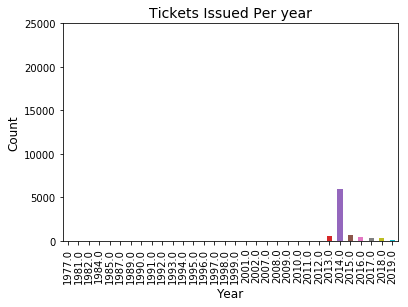

In [30]:
df['certifieddate'].dt.year.value_counts().sort_index().plot(kind='bar') #sorting index so data is in order by year

#Plotting the data
plt.title('Tickets Issued Per year', size=14)
plt.xlabel('Year', size=12)
plt.ylabel('Count', size=12)
plt.ylim(0,25000)
plt.xticks(rotation='vertical')
plt.show()

### We can observe that the tickets issued in 2014 is the highest, and in 2013 the second highest.

### Now let's compare and see if both the "boroid" and "boro" return the same numbers for furthers analysis

In [32]:
df['buildingid'].value_counts().sort_values(ascending=False)

57762     207
116935    187
7206      177
67273     141
97967     109
81719     109
119285     97
339821     88
808406     86
116998     85
21246      83
294186     81
45627      78
313702     76
221874     74
808361     71
351916     71
20679      70
141792     70
55615      69
119098     67
284638     66
341567     66
81989      65
59487      65
118885     64
111958     63
104340     63
143276     60
20765      58
         ... 
187503      1
23647       1
158995      1
517982      1
542538      1
640262      1
183687      1
23977       1
169493      1
19831       1
221832      1
809215      1
116751      1
107120      1
395877      1
173954      1
808959      1
885332      1
43601       1
158894      1
806058      1
17148       1
805629      1
339527      1
263746      1
3423        1
64865       1
28143       1
730566      1
363364      1
Name: buildingid, Length: 8714, dtype: int64

In [33]:
#df['boroid'] = df['boroid'].map({1: 'Manhattan', 2: 'Bronx',3: 'Brooklyn', 4: 'Queens',5: 'Staten Island'}) #use map function to set new values

In [34]:
#Plotting the data
#fig = plt.figure(figsize=(14,7))

#df['boroid'].value_counts().plot(kind='bar')

#plt.title('Tickets Issued by Borotype', size=14)
#plt.ylabel('Count', size=12)
#plt.xticks(rotation='horizontal')
#plt.show()

### Indeed, "boroid" and "boro" return the same acount of numbers.

In [35]:
df['boro'].value_counts() #counting the # of tickets by borough

BROOKLYN         19060
BRONX            16640
MANHATTAN         9336
QUEENS            3588
STATEN ISLAND      747
Name: boro, dtype: int64

### We can now compare which Borough got the highest tickets

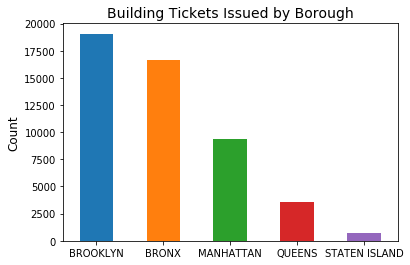

In [36]:
#Plotting the data
df['boro'].value_counts().plot(kind='bar')

plt.title('Building Tickets Issued by Borough', size=14)
plt.ylabel('Count', size=12)
plt.xticks(rotation='horizontal')
plt.show()

In [37]:
df['currentstatus'].value_counts().sort_values(ascending=False)

VIOLATION CLOSED                            41359
VIOLATION DISMISSED                          4090
FIRST NO ACCESS TO RE- INSPECT VIOLATION     1496
NOT COMPLIED WITH                            1334
NOV SENT OUT                                  488
DEFECT LETTER ISSUED                          185
NOV CERTIFIED LATE                            176
SECOND NO ACCESS TO RE-INSPECT VIOLATION      146
INVALID CERTIFICATION                          35
VIOLATION WILL BE REINSPECTED                  31
FALSE CERTIFICATION                            21
INFO NOV SENT OUT                               6
CIV14 MAILED                                    1
CERTIFICATION POSTPONMENT DENIED                1
VIOLATION REOPEN                                1
NOTICE OF ISSUANCE SENT TO TENANT               1
Name: currentstatus, dtype: int64

## Running some statistical analysis on two of my Borough to see what values they return and if they are outliers by any chance. 

In [38]:
len(df[df['boro'] == 'MANHATTAN']) / len(df) #dividing the number of Manhattan records by the entire data set

0.18909886370541412

In [39]:
len(df[df['boro'] == 'BROOKLYN']) / len(df) #dividing the number of Brooklyn records by the entire data set

0.38605659192643454

## Boroughs seems to be within the statistical means

### What are Ticket types by residential?

In [111]:
boro = ['BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND', 'BRONX'] #list of borough names to pass to for loop

for i in boro:
    """
    this for loop returns the percentage of residential permits
    within each borough

    count the number of residential permits then divide by the
    total number of borough permits
    """
    print ('\n' + i)
    print (df[df['boro'] == i]['residential'].value_counts() / len(df[df['boro'] == i]))

### Now let's check to see which Zip code had the highest ticket number and run some statistical analysis on them

### How many tickets have been issued by zip code?

In [40]:
df['zip'].value_counts().sort_index().head(5)  #counting the # of permits by zipcode then sorting them

10001.0     77
10002.0    175
10003.0    112
10005.0      1
10009.0    140
Name: zip, dtype: int64

In [41]:
df = df[df['zip'] >= 10000] #returns only zip codes that are > or = to 10000

### Zipcode with most tickets issues

In [42]:
df['zip'].value_counts().sort_values(ascending=False).head(5) #five zip codes with most tickets issued

11226.0    1826
10453.0    1794
10458.0    1624
11221.0    1496
10457.0    1474
Name: zip, dtype: int64

In [134]:
#zip_codes = GeoDataFrame.from_file('../directory/ZIP_CODE_040114.shp') #read in shape file

In [149]:
##zip_codes = GeoDataFrame.from_file(directory + '../ZIP_CODE_040114/ZIP_CODE_040114.shp') #read in shape file

In [150]:
#zip_codes['zip_code'] = zip_codes['ZIPCODE'].astype(int) #converting zipcode column to integer data type
#df['zip_code'] = df['zip_code'].astype(int)

In [151]:
#counts = df['zip_code'].value_counts()
#counts = counts.to_frame(name='count')
#counts = counts.reset_index()

In [153]:
#counts = GeoDataFrame(counts.merge(zip_codes, how='left', left_on='index', right_on='zip_code'))

In [154]:
#counts = counts.dropna() #drop null values

In [156]:
#Plotting the data
#fig, ax = plt.subplots(figsize = (8,8))

#counts.plot(column='count', cmap='Blues',alpha=1,linewidth=0.1, ax=ax)

#plt.title('Building Permits by Zipcode', size=20)
#plt.axis('off')
#plt.show()

# The heatmap is darker in areas with more tickets are issued, and lighter in areas with fewer tickets issued.

## We can observe that the tickets issued in 2014 is the highest, and in 2013 the second highest. Brooklyn had the highest number of tickets issued. And Zipcode 11226 had the highest number of tickets issued in Brooklyn.